<a href="https://colab.research.google.com/github/edhillon7/Computer_Vision-/blob/main/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

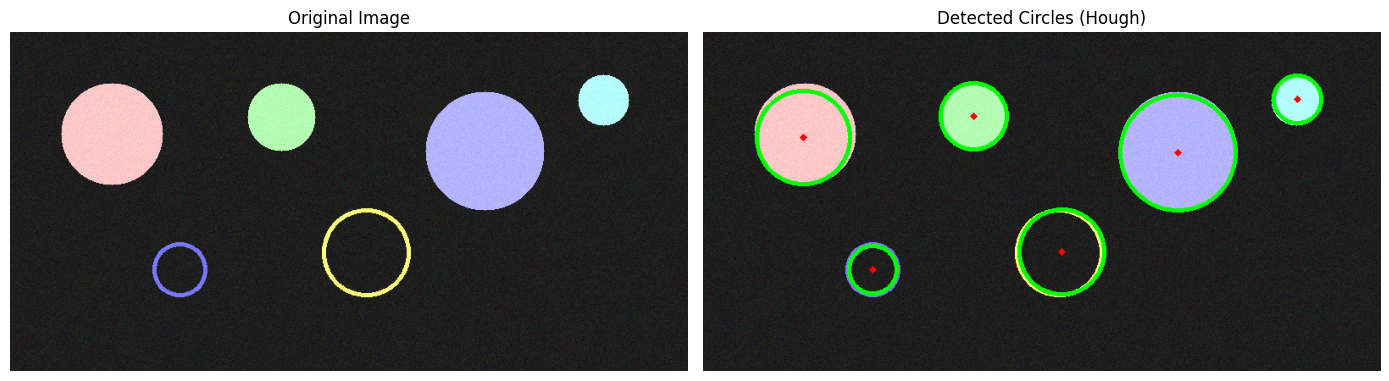

✅ Saved output image as 'hough_circles_output.jpg'

Detected circles (x, y, radius):
  - (560, 142), r=68
  - (423, 259), r=50
  - (200, 280), r=28
  - (319, 99), r=39
  - (118, 124), r=55
  - (701, 79), r=28


In [31]:
# -*- coding: utf-8 -*-
"""
Clean Hough Circle Detection Notebook
Author: Ekam Dhillon (cleaned)
Description:
  - Creates a sample image with multiple circles so the notebook runs without uploads
  - Demonstrates Hough Circle detection with OpenCV
  - Shows how to use an uploaded image instead (Colab) if preferred
  - Visualizes results and saves output
"""

# If running in Colab you can install dependencies with the following (uncomment if needed)
# !pip install --quiet opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Utility: create a synthetic sample image with circles
# --------------------------
def make_sample_circle_image(width=800, height=400, bg_color=30):
    """Return a BGR image with several circles drawn on it."""
    img = np.full((height, width, 3), bg_color, dtype=np.uint8)

    # Fixed circles (x, y, radius, color, thickness)
    shapes = [
        (120, 120, 60, (200, 200, 255), -1),
        (320, 100, 40, (180, 255, 180), -1),
        (560, 140, 70, (255, 180, 180), -1),
        (700, 80, 30, (255, 255, 180), -1),
    ]
    for (x, y, r, color, thickness) in shapes:
        cv2.circle(img, (x, y), r, color, thickness)

    # Add a few outlined circles
    cv2.circle(img, (200, 280), 30, (255, 120, 120), 3)
    cv2.circle(img, (420, 260), 50, (120, 255, 255), 4)

    # Add some gaussian noise so detection is realistic
    noise = (np.random.randn(height, width, 3) * 8).astype(np.int16)
    noisy = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    return noisy


# --------------------------
# Main: run Hough Circle detection on either sample image or uploaded image
# --------------------------

# Toggle: set to True if you want to upload your own image in Colab
USE_UPLOAD = False

if USE_UPLOAD:
    # Colab style upload (uncomment when running in Colab and set USE_UPLOAD=True)
    from google.colab import files
    print("📸 Upload an image for circle detection (press Enter after selecting file)")
    uploaded = files.upload()
    fname = next(iter(uploaded.keys()))
    img_bgr = cv2.imread(fname)
    if img_bgr is None:
        raise ValueError(f"Failed to read uploaded file '{fname}'")
else:
    img_bgr = make_sample_circle_image()

# Keep a copy for drawing
output = img_bgr.copy()

# Convert to grayscale and blur
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)  # reduce spurious edges

# HoughCircles parameters: adjust for your images
hough_params = {
    'dp': 1.2,        # inverse accumulator resolution
    'minDist': 40,    # min distance between centers
    'param1': 100,    # Canny high threshold
    'param2': 30,     # accumulator threshold (lower->more false positives)
    'minRadius': 10,
    'maxRadius': 200,
}

circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=hough_params['dp'],
    minDist=hough_params['minDist'],
    param1=hough_params['param1'],
    param2=hough_params['param2'],
    minRadius=hough_params['minRadius'],
    maxRadius=hough_params['maxRadius'],
)

# Draw results
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        # outer circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 3)
        # center
        cv2.circle(output, (x, y), 2, (0, 0, 255), 4)

# Display side-by-side using matplotlib (RGB conversion)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Circles (Hough)')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

# Save output for download
out_name = 'hough_circles_output.jpg'
cv2.imwrite(out_name, output)
print(f"✅ Saved output image as '{out_name}'")

# Optional: print detected circle coordinates
if circles is None:
    print("No circles detected. Try lowering param2 or adjusting minRadius/maxRadius.")
else:
    print('\nDetected circles (x, y, radius):')
    for (x, y, r) in circles[0, :]:
        print(f"  - ({x}, {y}), r={r}")

# End of notebook
